# Introduction to Python et al., Working with Audio Signals

[return to main page](index.ipynb)

For most of the exercises, we will use the very popular programming language [Python](https://www.python.org) together with a few external libraries from the [Scientific Python Stack](http://scipy.org).
To get started, you might also want to have a look a those:

* [Python Introduction](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/intro-python.ipynb) (pure Python, no NumPy)

* [Simple Signal Processing Example](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/simple-signals.ipynb) (quite similar to the things on this very page)

Note that Python is not the only option for the kind of tasks that we'll tackle here.
If you are interested in some alternatives, have a look at [Julia](http://julialang.org/), [R](http://www.r-project.org/), [Octave](http://octave.org/) or [Scilab](http://www.scilab.org/).
All the mentioned applications are open-source software and there are of course even more alternatives (both free and proprietary).

Most of the exercises in this course (including the one you're reading right now) are presented as [Jupyter (formerly known as IPython) notebooks](http://jupyter.org/).
They can be [viewed online](http://nbviewer.jupyter.org/github/spatialaudio/communication-acoustics-exercises/blob/master/index.ipynb), but it makes much more sense to download them and open and explore them locally with [Jupyter](http://jupyter.org/).

For installation instructions, see the section [Getting Started](index.ipynb#Getting-Started) on the main page.

To get an idea what Jupyter is all about, have a look at this [Jupyter Introduction](http://nbviewer.jupyter.org/github/mgeier/python-audio/blob/master/intro-jupyter.ipynb).
To use this very notebook, start the Jupyter Notebook server (which will open a browser window for you) with the command:

    jupyter notebook

## What Will We Learn Today?

* Basics of Python, Jupyter/IPython, NumPy, SciPy, matplotlib and some other external libraries

* How to create a simple audio signal

* How to plot this signal

* How to listen to this signal

* How to save this signal to the hard disk (as a WAV file)

* How to handle signals with more than one channel

* A quick demonstration of the *interaural time difference* (ITD)

## Notebook Cells

This notebook consists of so-called "cells", which can be used for normal text (see above) or for Python code (see below).
*Code cells* can be selected by a mouse click (or with the arrow up/down keys and *Enter*), the code can be edited and then executed by pressing *Shift+Enter* or by clicking the <button class="fa fa-step-forward fa-play icon-play btn btn-xs btn-default"></button> button in the top part of the page.

Don't be shy, try it:

In [2]:
50 - 5 * 4 + 12

42

Code cells can have multiple lines (use *Enter* for line breaks).
When the code cell is executed, all lines are executed, but only the value of the last line is displayed (except if there is no value to display).

Here's another code cell for you to play with:

New cells can be inserted by pressing the *a* or *b* keys (to insert *above* or *below* the current cell) or via the menu. You should also have a look at "Help" -> "Keyboard Shortcuts".

You can step through all cells in the notebook by repeatedly pressing *Shift+Enter*.
Alternatively, you can click "Run All" in the "Cell" menu.

## Importing Modules/Packages

In order to work with numeric arrays (in our case mainly audio signals), we import the [NumPy](http://www.numpy.org) package.

In [3]:
import numpy as np

Now we can use all NumPy functions (by prefixing "`np.`").

In [4]:
np.zeros(10000)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

## Tab Completion

*Exercise:* Type "`np.ze`" (without the quotes) and then hit the *Tab* key ...

## Array, Vector, Matrix

Audio signals can be stored in NumPy *arrays*.
Arrays can have arbitrarily many dimensions, but let's use only one-dimensional arrays for now.
Arrays can be created with [numpy.array()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html):

In [5]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Note that the result is not displayed when you assign to a variable (because assignment is a *statement* and not an *expression*).
To show the data, write the variable name separately as the last (or only) line of a code cell.

In [6]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

BTW, there is an easier way to get this particular array (using [numpy.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)):

In [7]:
b = np.arange(10)
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Note that the range starts with `0` and ends just before the given stop value!

If you are not used to programming, this might seem strange at first sight, but you'll see that this is vastly superior to starting with `1` and including the stop value.
If you're not convinced yet, have a look at [what E. W. Dijkstra has to say](http://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html).

## Getting Help

If you want to know details about the usage of `np.arange()` and all its supported arguments, have a look at its help text.
Just append a question mark to the function name (without parentheses!):

In [8]:
np.arange?

A help window should open in the lower part of the browser window.
This window can be closed by hitting the *q* key (like "quit").

Let's get some more help:

In [9]:
np.zeros?

You can also get help for the whole NumPy package:

In [10]:
np?

You can get help for any object by appending (or prepending) a question mark to the name of the object.
Let's check what the help system can tell us about our variable `a`:

In [11]:
a?

The help system may come in handy when solving the following exercises ...

## `np.arange()`

We'll often need sequences of evenly spaced numbers, so let's create some.

*Exercise:* Create a sequence of numbers with `np.arange()`, starting with 0 and up to (but not including) 6 with a step size of 1.

*Exercise:* Create a sequence of numbers with `np.arange()`, starting with 0 and up to (but not including) 0.6 with a step size of 0.1.

*Exercise:* Create a sequence of numbers with `np.arange()`, starting with 0.5 and up to (but not including) 1.1 with a step size of 0.1.

The previous exercise is somewhat tricky.
If you got it right, have a look at [arange considered harmful](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/misc/arange.ipynb) for what you *could have* done wrong.
If you got an unexpected result, have a look at [arange considered harmful](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/misc/arange.ipynb) for an explanation.

*Exercise:* Can you fix the problem?

What do we learn from all this?
$\Rightarrow$
`np.arange()` is great, but use it only with integer step sizes!

## `np.linspace()`

Another, slightly different method to create a sequence of evenly spaced numbers is [numpy.linspace()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).
Have a look at the documentation.

In [12]:
np.linspace?

*Exercise:* Create a sequence of numbers with `np.linspace()`, starting with 0 and up to (including) 6 with a step size of 1.

Note that the resulting array will have a *floating point* data type even if all inputs (and the step size) are integers.
This is not the case with `np.arange()`.

*Exercise:* Create a sequence of numbers with `np.linspace()`, starting with 0 and up to (but not including) 6 with a step size of 1.

*Exercise:* Create a sequence of numbers with `np.linspace()`, starting with 0 and up to (but not including) 0.6 with a step size of 0.1.

*Exercise:* Create a sequence of numbers with `np.linspace()`, starting with 0.5 and up to (but not including) 1.1 with a step size of 0.1.

Note that `np.linspace()` doesn't have the above-mentioned problem we had with `np.arange()`.

## `np.arange()` vs. `np.linspace()`

*Exercise:* Find some examples where `np.array()` works better and some where `np.linspace()` should be preferred.

## Creating a Sine Tone

Now let's create our first audio signal, shall we?

Let's generate a signal using the equation $y(t) = A\sin(\omega t)$ with $\omega = 2\pi f$ and $f$ being the frequency of the sine tone.
The maximum signal amplitude is given by $A$.
The variable $t$ obviously represents time.
Let's create a digital signal with evenly spaced values for $t$.

We can use the function [numpy.sin()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html) to create a sine tone. Let's look at its help text first.

In [13]:
np.sin?

Now that we know which function to call, we need appropriate input.
And that's where our sequences of evenly spaced values from above come into play.

The nice thing about NumPy functions like `np.sin()` is that they can operate on whole arrays at once, so it is not necessary to call the function on each single value separately.
Therefore, we can store the whole range of values for our time variable $t$ in one array.

According to the equation, each value of $t$ has to be multiplied with (the constant) $\omega$.
That's another nice thing about NumPy: we don't have to multiply every value of the array $t$ separately with $\omega$, we can multiply the whole array with a scalar at once, and NumPy does the element-wise multiplication for us.
This is called ["broadcasting"](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html), in case you stumble upon that word in the docs.
The array returned by `np.sin()` can (again using broadcasting) be multiplied by the constant scalar $A$ to get the final result.

The only thing that's still missing is $\pi$, but that's simple:

In [14]:
np.pi

3.141592653589793

*Exercise:* Create a sine tone with a frequency of 500 Hz, a duration of 1 second and an amplitude of 0.3.
Use a sampling rate of 44.1 kHz.
 The first value of $t$ should be 0.

In [22]:
dur = 1  # duration in seconds
amp = 0.3  # maximum amplitude
freq = 500  # frequency of the sine tone in Hertz
fs = 44100  # sampling frequency in Hertz

# t = ???

# y = ??? * np.sin(??? * t)

t = np.arange(np.ceil(dur * fs)) / fs
y = amp * np.sin(2 * np.pi * freq * t)

What happens if `dur` is not an integer?  
What happens if `dur` is not an integer multiple of `1/fs`?

*Exercise:* Try if your code still works in those cases.

*Exercise:* Use the [built-in len() function](https://docs.python.org/3/library/functions.html#len) to find out how many samples the resulting signal has.
How many is it supposed to have?

## Plotting

Python and NumPy cannot plot by themselves, they need some help from [matplotlib](http://matplotlib.org/).

In [23]:
import matplotlib.pyplot as plt
# activate inline plots inside the notebook
%matplotlib inline

Now we can plot the data from our array:

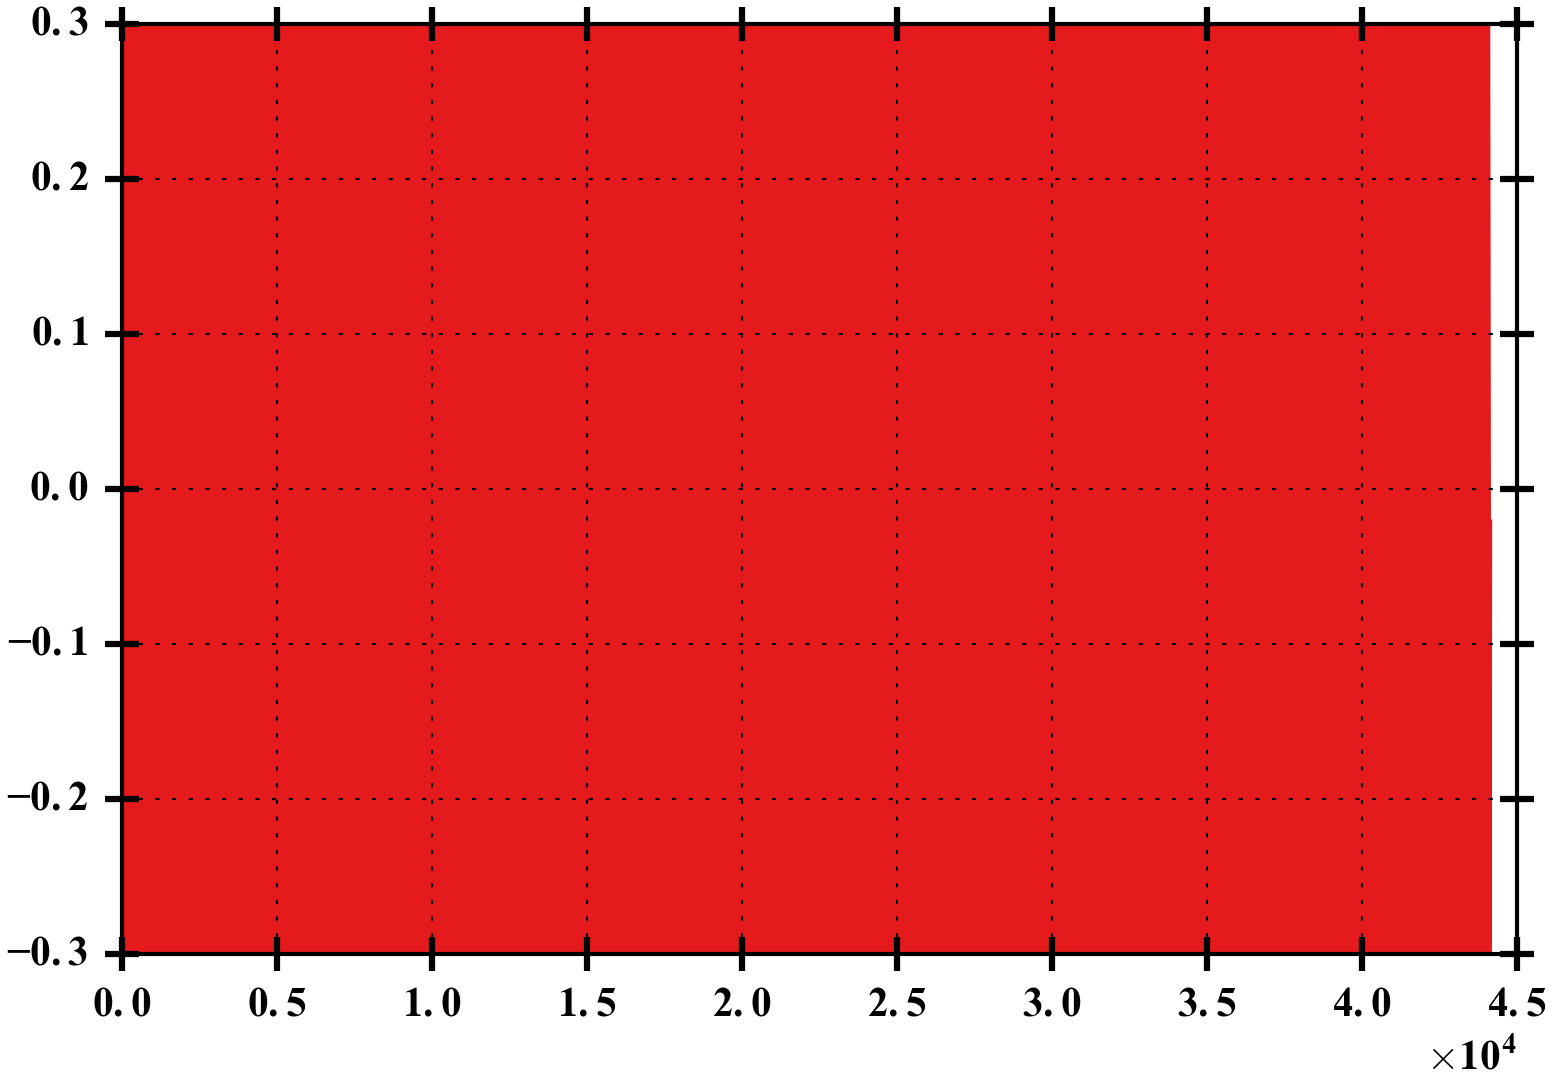

In [24]:
plt.plot(y)

As always, for more info:

In [ ]:
%matplotlib?

There is a similar "magic" command which may come in handy for quickly trying stuff without having to type all those imports and all the `np.` and `plt.` prefixes:

In [ ]:
%pylab?

However, this is not recommended for "serious" notebooks, because it makes the code harder to read and it may lead to confusion between functions with the same name (but different semantics) from different namespaces (`sum()` vs. `np.sum()`, `max()` vs. `np.max()`, `all()` vs. `np.all()` etc.).

## Tweaking the Plot

Let's look again at our plot.

In [ ]:
plt.plot(y);

Since we passed only a single array to the `plot()` function, the x-axis shows the sample index from 0 to the length of the signal in samples (minus one).
It may be more meaningful to show the time in seconds.

But let's close the previous plot first.

In [25]:
plt.close()

If we pass two arrays to the `plot()` function, the first one defines the mapping from sample indices to the actual values displayed on the x-axis, the second one specifies the corresponding y values.

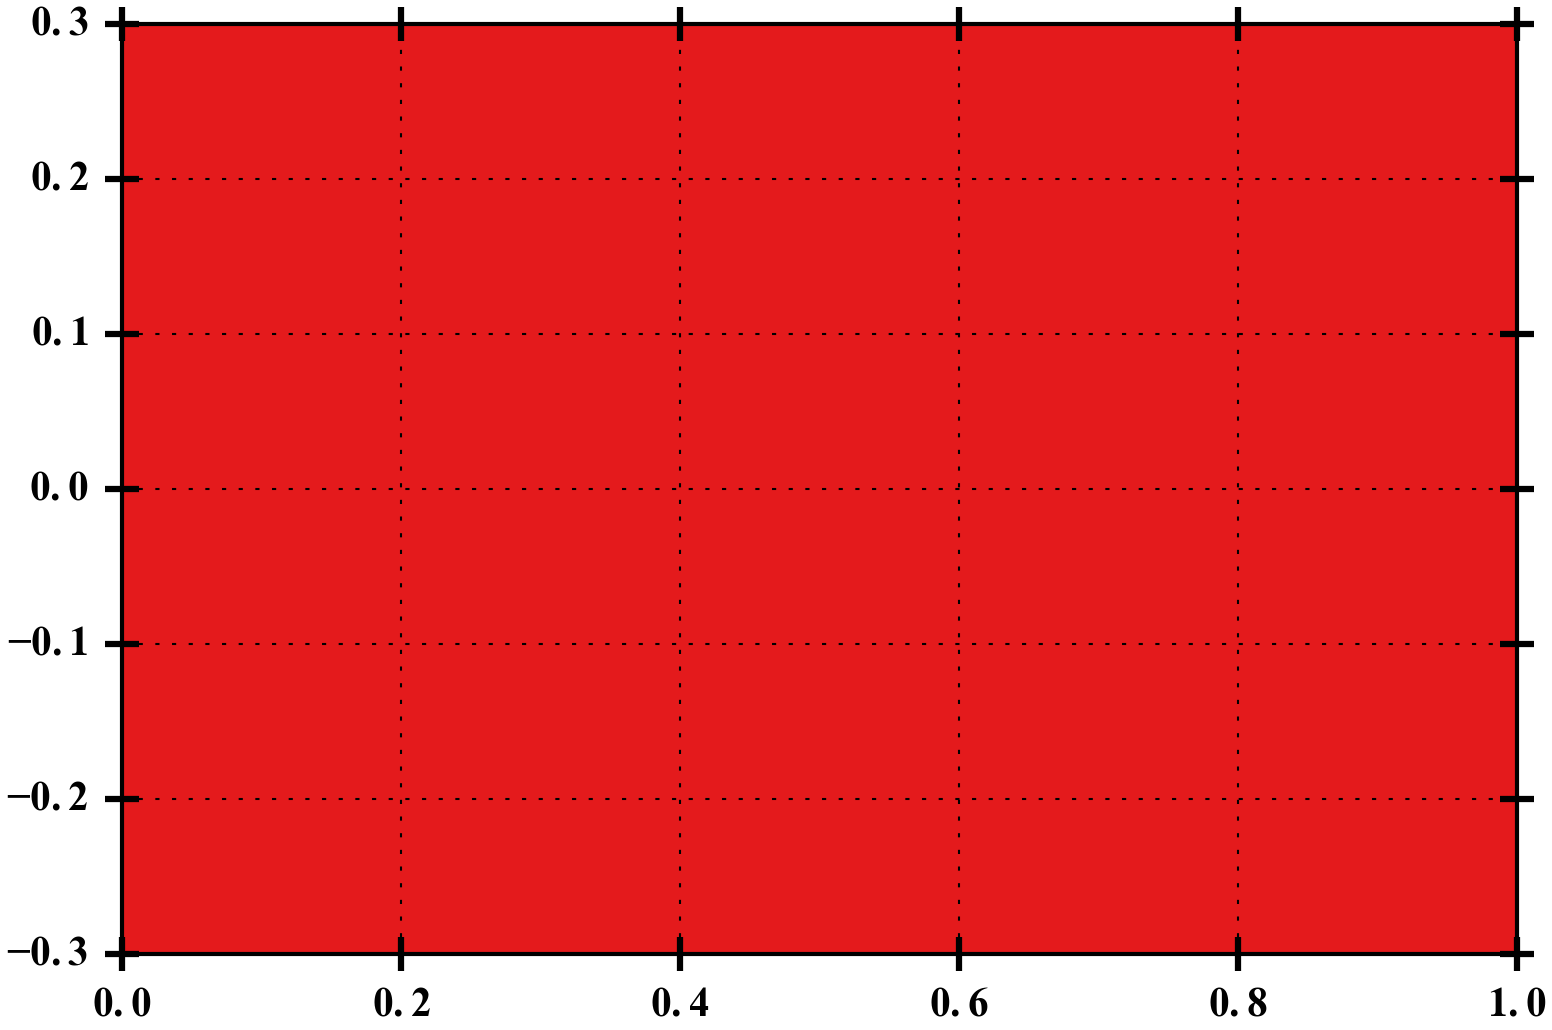

In [26]:
plt.plot(t, y);

Good, now the x-axis shows the time in seconds.
Let's create axis labels so that everyone knows.

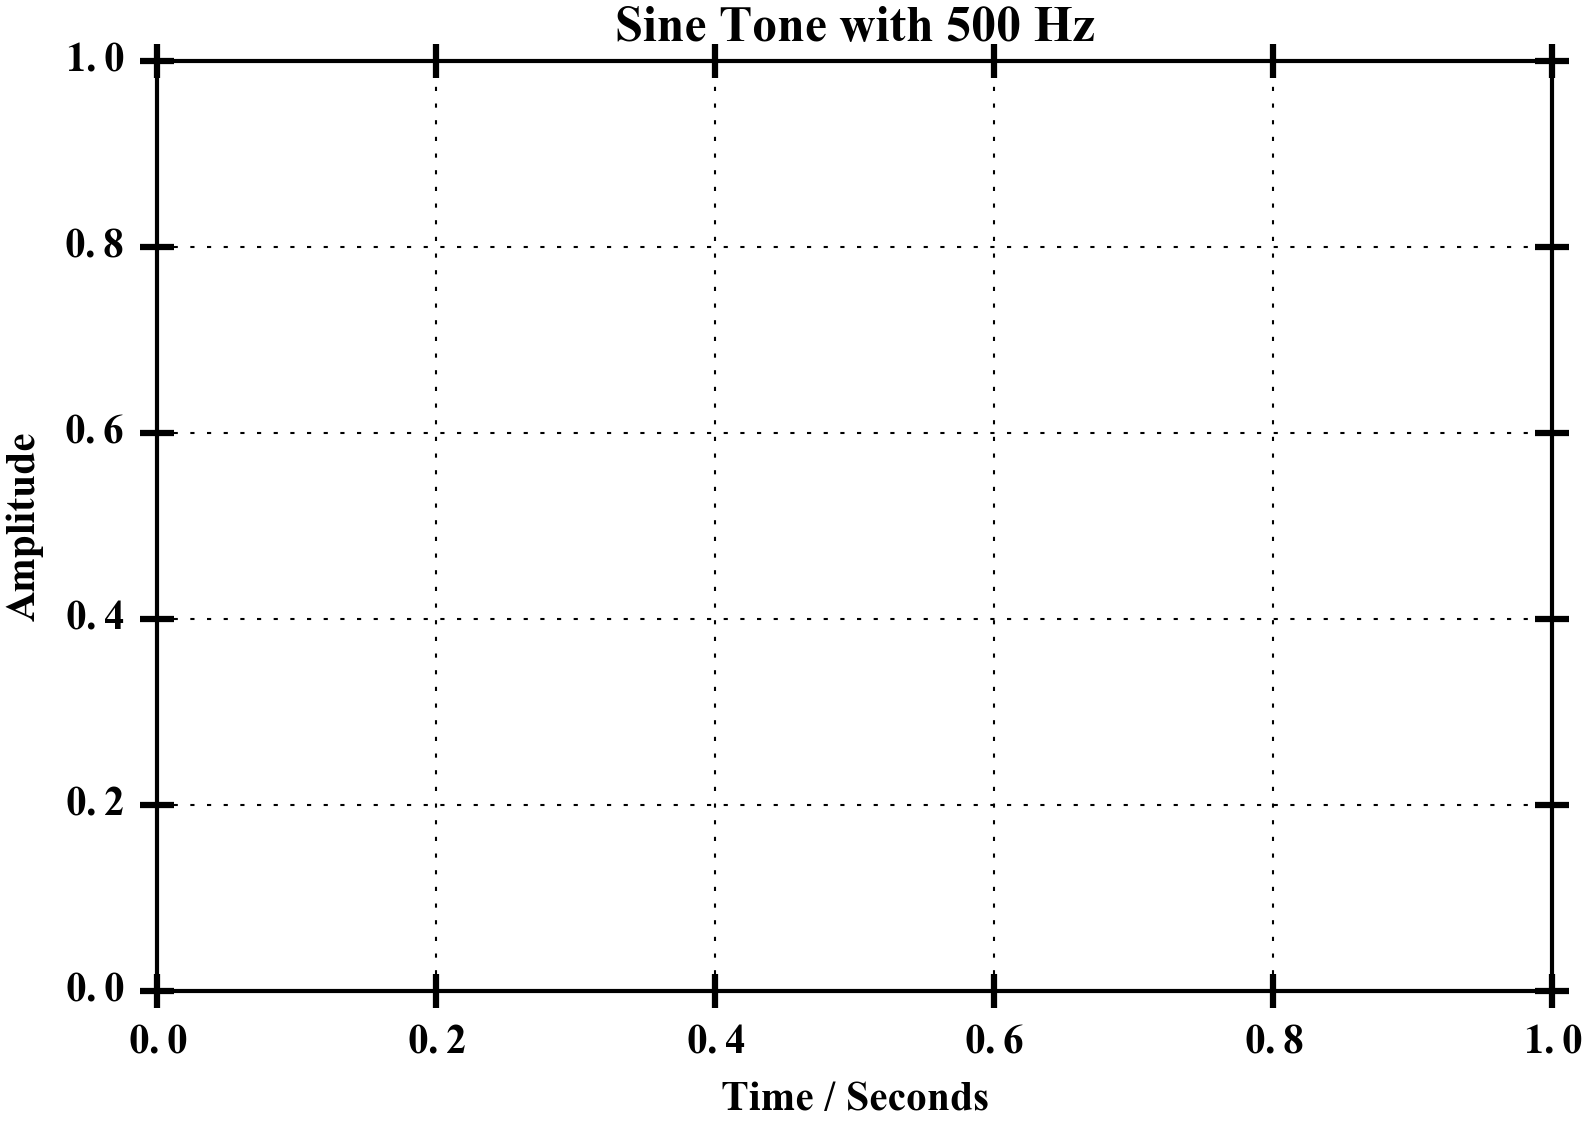

In [27]:
plt.xlabel("Time / Seconds")
plt.ylabel("Amplitude")
plt.title("Sine Tone with {} Hz".format(freq));

For more information, have a look at [Getting Started With `matplotlib`](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/plotting/matplotlib.ipynb).

## Listening to the Signal

Python cannot play audio on its own, but there are several external libraries available for that.
We'll be using [python-sounddevice](http://python-sounddevice.rtfd.org/), some other libraries are shown at [this overview page](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/playback-recording/index.ipynb).

To install the `sounddevice` module, just follow its installation instructions.
In many cases, it'll boil down to:

    python3 -m pip install sounddevice --user

Note: After the installation, you should restart any running IPython kernels (e.g. using the menu "Kernel" $\to$ "Restart"), otherwise they won't know about the newly installed Python module.
After restarting, you can use the menu option "Cell" $\to$ "Run All Above" to re-evaluate everything you've written above.

Once the library is installed, you can use it like this:

In [28]:
#import sounddevice as sd
import IPython.display as ipd

WARNING: You should turn the volume down, just to be sure not to destroy your loudspeakers/headphones/ears.

In [35]:
#sd.play(y, fs)
ipd.Audio(y,rate=fs)

*Exercise:* It's possible that you hear clicks in the beginning/end. What could be the reason for that? How could that be mitigated?

Have a look in the file [tools.py](tools.py) (in the current directory), probably you can find something useful there?

The clicks can be really annoying, it would be great if we could get rid of them automatically each time we play some signal.
To achieve that, let's create our own personal playback function (we'll learn more about creating functions in a minute ...):

In [36]:
import tools

def myplay(data):
    """Apply fade in/out and play with 44.1 kHz."""
    data = tools.fade(data, 2000, 5000)
    ipd.Audio(data, rate=44100)

Now let's try if that works:

In [34]:
myplay(y)

*Exercise:* Try different values for the fade in/out lengths and listen to the effect.

## Writing the Signal to a File

It's possible to write WAV files with the [wave module](https://docs.python.org/3/library/wave.html) from Python's standard library.
Since this is [quite complicated](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/audio-files/audio-files-with-wave.ipynb#Writing), we'll use the more convenient external library [PySoundFile](https://github.com/bastibe/PySoundFile/).
Of course there are also alternatives; have a look at [this overview page](http://nbviewer.ipython.org/github/mgeier/python-audio/blob/master/audio-files/index.ipynb).

Have a look at [the documentation](http://pysoundfile.readthedocs.org/) for how to install PySoundFile.
If you have [pip](https://pip.pypa.io/en/stable/installing.html) and the library [libsndfile](http://www.mega-nerd.com/libsndfile/) already installed, it should be enough to run this command in a terminal:

    python3 -m pip install PySoundFile --user

Again, you will have to restart the IPython kernel (e.g. using the menu "Kernel" $\to$ "Restart") to be able to import the newly installed Python module.
Afterwards, you might want to use the menu command "Cell" $\to$ "Run All Above" to re-create your signal.

Once installed, you can use it like this:

In [ ]:
import soundfile as sf

In [ ]:
sf.write('my_first_signal.wav', y, fs)

Note that the sampling rate has to be passed to be stored within the file.

*Exercise:* Find the sound file that was just written and play it in an external audio player ([play](http://sox.sourceforge.net/), [aplay](http://linux.die.net/man/1/aplay), [mplayer](https://www.mplayerhq.hu/), [audacious](http://audacious-media-player.org/), [aqualung](http://aqualung.factorial.hu/), [vlc](http://www.videolan.org/vlc/), ...).

*Exercise:* Here we have the same problem with clicks at the beginning/end.
Apply a fade in/out before writing the signal to the file.

## Creating a Function

Generating our sine tone wasn't very complicated, but let's still create a function that does all the steps for us.
We can then use this function repeatedly to create several different sine tones.

*Exercise:* Create a function named `mysine()` based on the template below.

In [ ]:
def mysine(frequency, amplitude, duration):
    """Generate sine tone with the given parameters @ 44.1 kHz."""
    samplerate = 44100
    
    # add your code here!

    return ...  # ???

Note the indentation of 4 spaces.
Every statement inside the function must start with the same indentation (except if you use statements which themselves need additional indentation, like a `for` loop).

The string below the first line is called "docstring".
Every function should have that.
The docstring can be shown with `help(mysine)` or, as we've seen before, by appending a question mark to the name (the former works in all Python interpreters, the latter only in Jupyter/IPython):

In [ ]:
mysine?

*Exercise:* See what happens if you use two question marks.

*Exercise:* Check if your function works by calling it with a few different input values and plotting the results.

## Creating another Function (for Plotting)

*Exercise:* Create a function that takes a signal (as a NumPy array) and creates a plot with axis labels and with the x-axis showing the time in seconds.
Like before, let's use a fixed sampling rate of 44.1 kHz.

*Exercise:* Using our two functions, create a sine tone and plot it, all in one line.

## `for` Loops

In the next exercise, you'll have to do very similar things multiple times in a row.
That sounds like a job for a `for` loop.

That's how `for` loops work in Python:

In [ ]:
for i in "one", 2, "III":
    # code within the loop body uses 4 spaces for indentation
    # ...
    print("i:", i)
    # ...
# de-indent to continue after the loop
print("finished!")

*Exercise:* Use a `for` loop to call the function `mysine()` three times with frequencies of your choice and store the results in three WAV files that have the respective frequencies in their file names.
Use [the format method of `str` objects](https://docs.python.org/3/library/stdtypes.html#str.format) to create the file names.
Don't forget to use `tools.fade()`.

Listen to the WAV files to check if everything is OK.

## Signal Processing with the *SciPy* Library

The name "SciPy" stands for two slightly different things:

* The [*Scientific Python Ecosystem*](http://scipy.org/), consisting of [NumPy](http://numpy.scipy.org/), [matplotlib](http://matplotlib.org/), [Jupyter](http://jupyter.org/)/[IPython](http://ipython.org/), the [SciPy library](http://scipy.org/scipylib/) and many more libraries and tools.

* The [SciPy library](http://docs.scipy.org/doc/scipy/reference/tutorial/general.html), which in turn is part of the *Scientific Python Ecosystem*.

We were using the former already, now let's use the latter:

In [ ]:
from scipy import signal

This imports SciPy's [signal processing module](http://docs.scipy.org/doc/scipy/reference/tutorial/signal.html).

Unlike "`import numpy as np`" we *never* import the whole `scipy` namespace.
The SciPy package is a collection of [many sub-packages and sub-modules](http://docs.scipy.org/doc/scipy/reference/); we only import those that we need.

You should *always* use one of those forms:

    from scipy import foobar
    import scipy.foobar as foo
    from scipy.foobar import foofun

... and *never* one of those:

<pre style="color:gray">
import scipy
from scipy import foofun
</pre>

... where `foobar` is the name of a sub-package/sub-module and `foofun` is the name of a function.

*Exercise:* Use the SciPy function [signal.chirp()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html) to create a linear sine sweep with an initial frequency of 100 Hz, a final frequency of 5000 Hz, with a length of 2 seconds and with an amplitude of 0.2.
Listen to the results.

*Exercise:* Change the sweep type from 'linear' to 'log' and listen to the results.

We'll see more of SciPy in later exercises, stay tuned!

## Superposition of Signals

Let's use our function `mysine()` from above to create a sine tone.
You can use the given parameters or change them to something else, if you prefer:

In [ ]:
sinetone = mysine(frequency=500, amplitude=0.3, duration=1.5)

*Exercise:* Create a noise signal of the same length using the function [numpy.random.normal()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html).
Use `scale=0.1` or at least something smaller than the amplitude of the sine tone.

*Exercise:* Create the superposition of the two signals and listen to it.
Plot it, too.

*Exercise:* Use the function `mysine()` (two times) to create a superposition of a sine tone with a frequency of 500 Hz and another sine tone with a frequency of 507 Hz - each with an `amplitude=0.2`.
What do you notice when listening to the signal?

*Exercise:* Plot the signal and try to *see* what you *heard* before.

## More Than One Channel $\to$ Two-Dimensional Arrays

Up to now, we were only using audio signals with a single channel.
Those could be easily stored in a one-dimensional NumPy array.

To store more than one channel, we can use a two-dimensional array.
Two-dimensional arrays somewhat look like lists of lists, but internally, they are still stored in one contiguous area of memory.

There are several functions for creating arrays which allow to specify the number of rows and columns, e.g. [numpy.zeros()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) and [numpy.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html).

In [ ]:
np.zeros((4, 2))

In [ ]:
np.ones((4, 2))

Arrays can also be created from lists of lists (a.k.a. *nested* lists) with [numpy.array()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html):

In [ ]:
np.array([[.1, .2], [.3, .4], [.5, .6], [.7, .8]])

Note that the inner lists provide the individual rows of the array.

Two-dimensional arrays can also be created by concatenating a list of one-dimensional arrays (or lists) by columns using [numpy.column_stack()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html):

In [ ]:
a = np.column_stack([[.1, .2, .3, .4], [.5, .6, .7, .8]])
a

It is common to store the channels of a multi-channel signal as the columns of an array.
This is not guaranteed, though, you might also encounter functions that expect the channels to be along the rows of an array.
You should always have a look in the documentation!

If you want to flip rows and columns, you can transpose the array:

In [ ]:
b = a.T
b

The transposed array is *not* a copy of the original one, it's rather a different *view* into the same memory.
This means that if you change an element of the transposed array, this change will also be visible in the original array!

In [ ]:
b[1, 2] = 0
a

You can see in the array properties that the transposed array doesn't "own" the data:

In [ ]:
a.flags.owndata

In [ ]:
b.flags.owndata

The transposed array has a property called `base` that holds a reference to the original array.

In [ ]:
b.base is a

*Exercise:* Create a two-channel signal with a sine tone in each channel.
To do that, call `mysine()` twice and concatenate the two resulting arrays with `np.column_stack()`.
Use different frequencies for the channels to be able to check which one is left and which is right.
Listen to the signal with headphones and check which channel is left and which is right.

## Array Properties

Let's create some two-channel noise:

In [ ]:
x = np.random.normal(scale=0.2, size=(int(1.5 * fs), 2))
x

*Exercise:* Try those different ways to obtain the size of the array:

In [ ]:
len(x)

In [ ]:
x.shape

In [ ]:
x.size

In [ ]:
x.nbytes

*Exercise:* What's the difference between them?

In [ ]:
len?

In [ ]:
np.ndarray.shape?

In [ ]:
np.ndarray.size?

In [ ]:
np.ndarray.nbytes?

*Exercise:* What's the length in seconds?

*Exercise:* There's much more information about the array, try the following commands and find out what they mean.

In [ ]:
x.ndim

In [ ]:
x.dtype

In [ ]:
x.itemsize

In [ ]:
x.strides

In [ ]:
x.flags

*Exercise:*
You can also get some statistical values about the data in the array.
Check if they are consistent with the given normally distributed noise signal.

In [ ]:
x.max()

In [ ]:
x.min()

In [ ]:
x.ptp()

In [ ]:
x.mean()

In [ ]:
x.std()

In [ ]:
x.var()

Most of these *methods* also exist as *functions*, e.g.

In [ ]:
np.max(x)

Both the functions and the methods have an optional *axis* argument.

*Exercise:* Try `axis=0` with all of the above functions/methods.

In [ ]:
x.std(axis=0)

In [ ]:
np.mean(x, axis=0)

*Exercise:* What's the difference between `axis=0` and `axis=1`?
What does `axis=-1` mean?

## Inter-aural Time Difference (ITD)

You will learn about this later in the lecture, but you can already listen to it now!

*Exercise:* Remember the array `t` of time instances from way before?
Create a new two-dimensional array with `t` as its first column and `t` + 0.5 milliseconds as the second column.
Use this two-channel array of time instances to create a two-channel sine tone with a frequency of 500 Hz.
Both channels shall have the same frequency, but because of the delayed time instances, the right channel will be delayed.

*Exercise:* Listen to the resulting two-channel signal using the function `myplay()` from above (use headphones!). What do you hear? What effect did the time-shift have?

If you don't hear any difference, don't worry, just continue with the next exercise ...

*Exercise:* Use two nested `for` loops to generate a sequence of two-channel signals and play them back immediately.
Both channels should contain a sine tone with the same frequency and the same duration of half a second, but with a time lag relative to the other channel.
In the inner loop, you should play back a series of signals with a relative delay of 0.6, 0.4, 0.2, 0, -0.2, -0.4 and -0.6 ms.
The outer loop shall play this series three times, using the frequencies
500, 1000 and 2000 Hz, respectively.
Run the script and notice how you perceive (or not) the different time lags.
This exercise is meant for headphone listening, do not use loudspeakers!
Note that by default, [sd.play()](http://python-sounddevice.rtfd.org/#sounddevice.play) (and therefore also our little `myplay()` function) does not wait until playback is finished.
But right now, we want it to.
We can either use the `blocking=True` option, or we call [sd.wait()](http://python-sounddevice.rtfd.org/#sounddevice.wait) right after `myplay()`.

## Broadcasting

We already saw before, that when a scalar is multiplied by an array, this multiplication is done element-wise on the array.
The NumPy people call this [broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

The great thing about it is that it is not limited to operations between a scalar and an array, but also between arrays of different numbers of dimensions.

Let's, for example, take a one-dimensional array with two values and multiply it with our two-dimensional array `x` from before:

In [ ]:
np.array([0.5, 100]) * x

Although these two arrays clearly have a different shape and a different number of dimensions, the multiplication worked.
In this case, each element of the first column of `x` was multiplied with the first value of the other array, and same for the second column and the second value of the array.

In this example, the result has the same shape of one of the operands, and the other operand was "stretched" along its singular (or rather missing) dimension.

But it doesn't have to be that way.
Let's create a two-dimensional array that consists of only one column:

In [ ]:
y = np.random.normal(scale=0.2, size=(int(1.5 * fs), 1))
y

In [ ]:
y.shape

When we multiply a one-dimensional array with this two-dimensional column-array, none of the dimensions have the same size.
Nevertheless, we can multiply them and both arrays get "stretched" (along their singular/missing dimension) leading to a result having a shape larger than any of the operands:

In [ ]:
np.array([0.5, 100]) * y

The left column of the result is `y` multiplied by the first element of the one-dimensional array, the right column is the same `y` multiplied by the second element.

That's going to be useful in the next exercise.

## Complex Harmonic Sounds

*Exercise:* Create a 5-channel signal (i.e. a two-dimensional array with 5 columns) with a length of 2 seconds.
Each channel shall contain a sine tone with its own frequency.
Use the frequencies 200 Hz, 400 Hz, 600 Hz, 800 Hz and 1000 Hz.
Use an amplitude of $A=0.3$ for the first channel, $A/2$ for the second channel, $A/3$ for the third etc.

Hint: Do this by using a two-dimensional array with one column for the time instances and multiply this with a one-dimensional array of frequencies.
The amplitudes should also be a one-dimensional array.

*Exercise:* From this 5-channel signal, create a mono signal, as a superposition of the five channels.
Listen to it.

Hint: Use [numpy.sum()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) (or the equivalent method).

*Exercise:* Same as above, but skip one of the frequencies.
Try to hear the difference.
Skip another one, etc.

*Exercise:* Plot the mono signal(s). Do you recognize the sinusoidal components?

*Exercise:* Add more tones (let's say a total of 20) using multiples of the fundamental frequency (with the same decreasing amplitudes as above).
How does this sound like?
How does the plot look like?

*Exercise:* How do things change if you only use the odd multiples of the fundamental frequency?

## Appendix

If there is too much time left (which is unlikely), you can have a look at those commands:

In [ ]:
%whos

In [ ]:
%qtconsole

In [ ]:
%run?

In [ ]:
%time?

In [ ]:
%timeit?

In [ ]:
%profile?

## Solutions

If you had problems solving some of the exercises, don't despair!
Have a look at the [example solutions](intro-solutions.ipynb).

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>